In [1]:
import sys
import os
import anndata as ad
import pandas as pd
import scanpy as sc
import re
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import scimap as sm  
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from scipy.stats import pearsonr

#set current directory
os.chdir("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/data_e41")
#os.chdir("/Users/roxannepelletier/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/")
import napari

LSP11402 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11402/quantification/LSP11402--unmicst_cellRing.csv"
LSP11349 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11349/quantification/LSP11349--unmicst_cellRing.csv"


Running SCIMAP  2.1.0


In [28]:
feature_table_path = [LSP11402, LSP11349]
adata = sm.pp.mcmicro_to_scimap (feature_table_path, remove_dna=False, log = True, 
                                 drop_markers= ['DNA2','DNA3','DNA4','DNA5','DNA6','DNA7','DNA8','DNA9','DNA10','DNA11',
                                                'GATA3','CD63','SOX2','MCL1','PDL1','SOX6'])

Loading LSP11402--unmicst_cellRing.csv
Loading LSP11349--unmicst_cellRing.csv


In [29]:
adata.X

array([[8.38395679, 5.86044708, 5.98564396, ..., 7.15395371, 6.44270818,
        5.67512629],
       [7.42097609, 6.40709091, 5.59191637, ..., 5.69026105, 6.26606691,
        5.74566539],
       [7.59329041, 6.47051832, 5.63702998, ..., 5.73082418, 6.26539689,
        5.75226694],
       ...,
       [7.84348743, 7.63890231, 7.31496801, ..., 5.62550531, 5.9898644 ,
        5.29037632],
       [7.68130396, 7.31191629, 6.99475201, ..., 5.65330562, 5.99246761,
        5.29888728],
       [8.12264045, 6.46035961, 6.69032517, ..., 5.64334597, 5.98226071,
        5.16047076]])

In [30]:
gate = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/gating_materials/gating_e41/all_gates.csv")
sm.pp.rescale(adata, gate=gate, log=True, imageid='imageid', failed_markers=None, method='all', random_state=0)

C:\Users\tav9\AppData\Local\anaconda3\envs\scimap_new\lib\site-packages\scimap\preprocessing\rescale.py:100: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Scaling Image LSP11402--unmicst_cellRing
Scaling DNA1
Scaling 5hmC
Scaling Tet2
Scaling SOX10
Scaling LaminA/C/B1
Scaling PMEL
Scaling SOX9
Scaling S100B
Scaling MART1
Scaling aSMA
Scaling MITF
Scaling p21
Scaling panCK
Scaling ECAD
Scaling pSTAT1
Scaling MCM2
Scaling S100A1
Scaling Ki67
Scaling pSTAT3
Scaling PD1
Scaling pH3
Scaling PRAME
Scaling IRF5
Scaling IRF1
Scaling B2M
Scaling MX1
Scaling CD11c
Scaling NGFR
Scaling CK14
Scaling LDH
Scaling pERK
Scaling BCL2
Scaling VIM
Scaling CD3e
Scaling pS6
Scaling CCND1
Scaling CCNA2
Scaling PCNA
Scaling DNA12
Scaling p16/CDKN2A
Scaling HIF1a
Scaling H3k27me3
Scaling Image LSP11349--unmicst_cellRing
Scaling DNA1
Scaling 5hmC
Scaling Tet2
Scaling SOX10
Scaling LaminA/C/B1
Scaling PMEL
Scaling SOX9
Scaling S100B
Scaling MART1
Scaling aSMA
Scaling MITF
Scaling p21
Scaling panCK
Scaling ECAD
Scaling pSTAT1
Scaling MCM2
Scaling S100A1
Scaling Ki67
Scaling pSTAT3
Scaling PD1
Scaling pH3
Scaling PRAME
Scaling IRF5
Scaling IRF1
Scaling B2M
Scaling 

AnnData object with n_obs × n_vars = 209829 × 42
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid'
    uns: 'all_markers', 'gates'
    layers: 'log'

In [31]:
adata.X

array([[0.66140771, 0.26213653, 0.21969435, ..., 0.64501967, 0.44983013,
        0.08861876],
       [0.54093104, 0.37624049, 0.15133407, ..., 0.08455122, 0.29514819,
        0.11999393],
       [0.56248895, 0.38948004, 0.15916684, ..., 0.09972205, 0.29456146,
        0.12293024],
       ...,
       [0.57141295, 0.62519786, 0.44945511, ..., 0.00858155, 0.19173403,
        0.21357413],
       [0.54977055, 0.56112301, 0.39267174, ..., 0.02021352, 0.19330711,
        0.21543555],
       [0.60866424, 0.38101621, 0.33868824, ..., 0.01604629, 0.18713924,
        0.18516276]])

In [32]:
#add the phenotyping wf
phenotype = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e41/phenotyping_e41.csv")
sm.tl.phenotype_cells(adata, phenotype, gate=0.5, label='phenotype', 
                      imageid='imageid', pheno_threshold_percent=None, pheno_threshold_abs=None)

Phenotyping Melanocytes
-- Subsetting all-rest
Phenotyping Keratinocytes
Phenotyping Myofibroblasts
Phenotyping T cells
Phenotyping Myeloid lineage
-- Subsetting Keratinocytes
Phenotyping T cells
Consolidating the phenotypes across all groups


C:\Users\tav9\AppData\Local\anaconda3\envs\scimap_new\lib\site-packages\scimap\tools\phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\tav9\AppData\Local\anaconda3\envs\scimap_new\lib\site-packages\scimap\tools\phenotype_cells.py:290: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



AnnData object with n_obs × n_vars = 209829 × 42
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'phenotype'
    uns: 'all_markers', 'gates'
    layers: 'log'

In [153]:
adata

AnnData object with n_obs × n_vars = 209829 × 42
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'phenotype'
    uns: 'all_markers', 'gates'
    layers: 'log'

In [155]:
adata.obs.imageid.value_counts()

imageid
LSP11349--unmicst_cellRing    112015
LSP11402--unmicst_cellRing     97814
Name: count, dtype: int64

In [195]:
imageid=['LSP11349--unmicst_cellRing']
data=adata[(adata.obs['imageid'].isin(imageid))]

In [196]:
b=pd.read_csv(r"C:\Users\tav9\HMS Dropbox\Tuulia Vallius\2024-Vallius-Novikov-Shi-Melanoma_PCA\data\e24\classical_nbhd_entropy\LSP11349_classical_neighborhood_entropy_df.csv")

In [197]:
a=data.to_df()

In [198]:
a

,DNA1,5hmC,Tet2,SOX10,LaminA/C/B1,PMEL,SOX9,S100B,MART1,aSMA,...,VIM,CD3e,pS6,CCND1,CCNA2,PCNA,DNA12,p16/CDKN2A,HIF1a,H3k27me3
LSP11349--unmicst_cellRing_1,0.536702,0.100888,0.080103,0.133307,0.109298,0.158652,0.029769,0.008122,0.066419,0.058272,...,0.004658,0.067406,0.492552,0.039869,0.041584,0.092386,0.511850,0.124076,0.199451,0.045594
LSP11349--unmicst_cellRing_2,0.614320,0.302383,0.198448,0.177097,0.193121,0.219427,0.030335,0.011552,0.065474,0.056198,...,0.006956,0.066407,0.473707,0.037334,0.039142,0.090548,0.510764,0.117072,0.203109,0.045537
LSP11349--unmicst_cellRing_3,0.627541,0.286558,0.227942,0.197802,0.198006,0.265969,0.030573,0.011151,0.066782,0.058598,...,0.006092,0.068946,0.500819,0.040392,0.050380,0.091174,0.512126,0.120572,0.206686,0.041280
LSP11349--unmicst_cellRing_4,0.589457,0.218407,0.168670,0.167090,0.151986,0.206036,0.033205,0.008482,0.062409,0.054289,...,0.007924,0.066983,0.500454,0.039242,0.055119,0.084182,0.512346,0.122711,0.211462,0.045499
LSP11349--unmicst_cellRing_5,0.596340,0.314896,0.227976,0.197439,0.198293,0.266609,0.031741,0.014880,0.063471,0.059840,...,0.005950,0.071443,0.500635,0.038865,0.057114,0.088546,0.512512,0.121864,0.209075,0.041008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LSP11349--unmicst_cellRing_112011,0.656632,0.541768,0.588938,0.623045,0.573223,0.531135,0.267758,0.203456,0.170631,0.068416,...,0.209194,0.376121,0.736076,0.513700,0.515840,0.341274,0.799028,0.404743,0.508054,0.410711
LSP11349--unmicst_cellRing_112012,0.564154,0.606315,0.430841,0.303098,0.330832,0.300430,0.047358,0.019202,0.077190,0.055747,...,0.051619,0.297282,0.501557,0.055250,0.123296,0.103342,0.521552,0.000000,0.202253,0.213925
LSP11349--unmicst_cellRing_112013,0.571413,0.625198,0.449455,0.323742,0.350980,0.352565,0.049487,0.029743,0.077467,0.057951,...,0.063972,0.294150,0.513955,0.057722,0.219230,0.101266,0.527421,0.008582,0.191734,0.213574
LSP11349--unmicst_cellRing_112014,0.549771,0.561123,0.392672,0.289245,0.308322,0.330795,0.044280,0.019046,0.074011,0.058001,...,0.036204,0.249674,0.502197,0.051819,0.131215,0.097387,0.519455,0.020214,0.193307,0.215436


In [199]:
a['CellID']=data.obs['CellID']
a['phenotype']=data.obs['phenotype']
a['X_centroid']=data.obs['X_centroid']
a['Y_centroid']=data.obs['Y_centroid']
a['imageid']=data.obs['imageid']

In [200]:
a = a.set_index('CellID')
b = b.set_index('CellID')

In [201]:
del b['X_centroid']
del b['Y_centroid']

In [202]:
c = a.merge(b, on='CellID', how='left')

In [203]:
c

,DNA1,5hmC,Tet2,SOX10,LaminA/C/B1,PMEL,SOX9,S100B,MART1,aSMA,...,X_centroid,Y_centroid,imageid,Unnamed: 0,SOX10+SOX9-NGFR-MART1-,SOX10+SOX9-NGFR-MART1+,SOX10+SOX9+NGFR-MART1+,SOX10+SOX9-NGFR+,SOX10+SOX9+NGFR-MART1-,entropy
CellID,,,,,,,,,,,,,,,,,,,,,
1,0.536702,0.100888,0.080103,0.133307,0.109298,0.158652,0.029769,0.008122,0.066419,0.058272,...,11977.582609,1936.614130,LSP11349--unmicst_cellRing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.614320,0.302383,0.198448,0.177097,0.193121,0.219427,0.030335,0.011552,0.065474,0.056198,...,11870.822068,1983.537839,LSP11349--unmicst_cellRing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.627541,0.286558,0.227942,0.197802,0.198006,0.265969,0.030573,0.011151,0.066782,0.058598,...,11923.015785,1977.506709,LSP11349--unmicst_cellRing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.589457,0.218407,0.168670,0.167090,0.151986,0.206036,0.033205,0.008482,0.062409,0.054289,...,11959.223022,1980.032374,LSP11349--unmicst_cellRing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.596340,0.314896,0.227976,0.197439,0.198293,0.266609,0.031741,0.014880,0.063471,0.059840,...,11893.012939,1999.670980,LSP11349--unmicst_cellRing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112011,0.656632,0.541768,0.588938,0.623045,0.573223,0.531135,0.267758,0.203456,0.170631,0.068416,...,16548.880088,22757.422442,LSP11349--unmicst_cellRing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112012,0.564154,0.606315,0.430841,0.303098,0.330832,0.300430,0.047358,0.019202,0.077190,0.055747,...,28312.595127,23624.097470,LSP11349--unmicst_cellRing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112013,0.571413,0.625198,0.449455,0.323742,0.350980,0.352565,0.049487,0.029743,0.077467,0.057951,...,28340.627119,23633.820339,LSP11349--unmicst_cellRing,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
c.to_csv(r"C:\Users\tav9\HMS Dropbox\Tuulia Vallius\2024-Vallius-Novikov-Shi-Melanoma_PCA\data\e24\classical_nbhd_entropy\LSP11349_classical_neighborhood_entropy_df_segmask_plots_Fig3.csv")

In [212]:
from scipy.ndimage import gaussian_filter

#test, contour mask for only tumor cells
def plot_tumor_marker_intensity_with_contours_dots(df, marker_name, cell_type_col, tumor_cell_type, sigma=2, levels=10, n_bins=50, dot_size=20):
    """Plots marker intensity, contours, and dots with correct histogram calculation."""

    x = df['X_centroid'].values
    y = df['Y_centroid'].values
    intensity = df[marker_name].values
    cell_types = df[cell_type_col].values

    tumor_mask = cell_types == tumor_cell_type
    x_tumor = x[tumor_mask]
    y_tumor = y[tumor_mask]
    intensity_tumor = intensity[tumor_mask]
    
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()

    xi = np.linspace(x_min, x_max, n_bins)
    yi = np.linspace(y_min, y_max, n_bins)

    # Then plot the scatter plot (tumor cells colored, others grey)
    tumor_mask = cell_types == tumor_cell_type
    plt.figure(figsize=(10, 6))
    plt.scatter(x[~tumor_mask], y[~tumor_mask], c='silver', s=dot_size, label='Other')
    plt.scatter(x[tumor_mask], y[tumor_mask], c=intensity[tumor_mask], s=dot_size, cmap='plasma', vmin=0,vmax=2,label=f'{tumor_cell_type}')
    plt.colorbar(label=f'{marker_name} Intensity')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'{marker_name} Intensity in {tumor_cell_type}')
    plt.legend()

    plt.xlim(22000,29000)
    plt.ylim(17000,21500)

    plt.tight_layout()
    plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/plasma_cbar.pdf")
    plt.show()
    

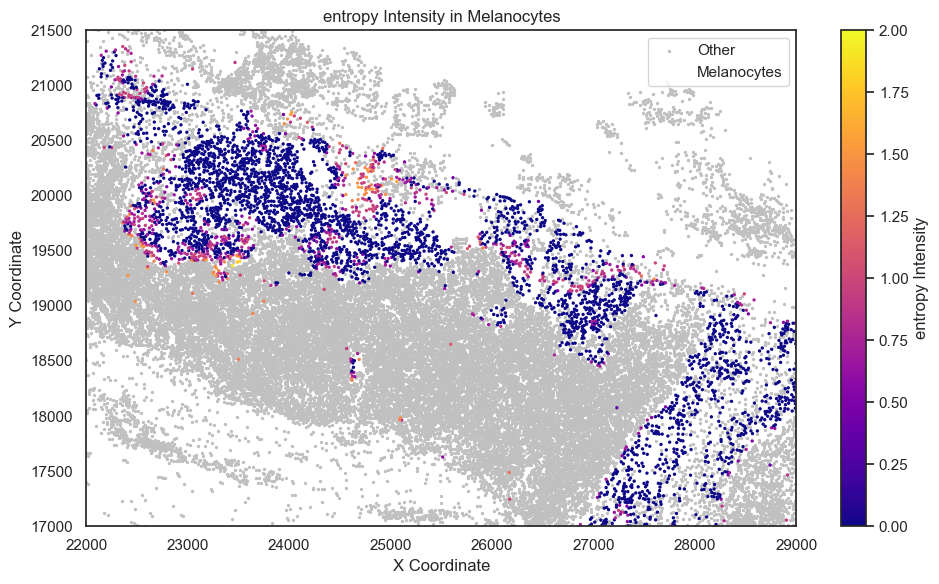

In [213]:
plot_tumor_marker_intensity_with_contours_dots(c, 'entropy', 'phenotype', 'Melanocytes', sigma=1, levels=10, dot_size=2)

In [121]:
def plot_tumor_marker_intensity_with_contours_dots(df, marker_name, cell_type_col, tumor_cell_type, grey_cell_type, sigma=2, levels=10, n_bins=50, dot_size=20):
    """Plots marker intensity, contours, and dots with a specific population colored grey."""

    x = df['X_centroid'].values
    y = df['Y_centroid'].values
    intensity = df[marker_name].values
    cell_types = df[cell_type_col].values

    tumor_mask = cell_types == tumor_cell_type
    grey_mask = cell_types == grey_cell_type
    other_mask = ~(tumor_mask | grey_mask)

    x_tumor = x[tumor_mask]
    y_tumor = y[tumor_mask]
    intensity_tumor = intensity[tumor_mask]

    x_grey = x[grey_mask]
    y_grey = y[grey_mask]

    x_other = x[other_mask]
    y_other = y[other_mask]

    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()

    xi = np.linspace(x_min, x_max, n_bins)
    yi = np.linspace(y_min, y_max, n_bins)

    # Create the scatter plot
    plt.figure(figsize=(11, 6))
    plt.scatter(x_other, y_other, c='silver', s=dot_size, alpha=0.7, label='Other')
    plt.scatter(x_grey, y_grey, c='dimgrey', s=dot_size, alpha=0.7, label=grey_cell_type)
    plt.scatter(x_tumor, y_tumor, c=intensity_tumor, s=4, cmap='jet', vmin=0, vmax=2, label=f'{tumor_cell_type}')
    plt.colorbar(label=f'{marker_name} Intensity')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'{marker_name} Intensity in {tumor_cell_type} with {grey_cell_type} highlighted')
    #plt.legend()
    plt.xlim(21000, 29300)
    plt.ylim(16300, 21500)

    plt.tight_layout()
    plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/entropy_plot_MEL18.png", dpi=600)
    plt.show()

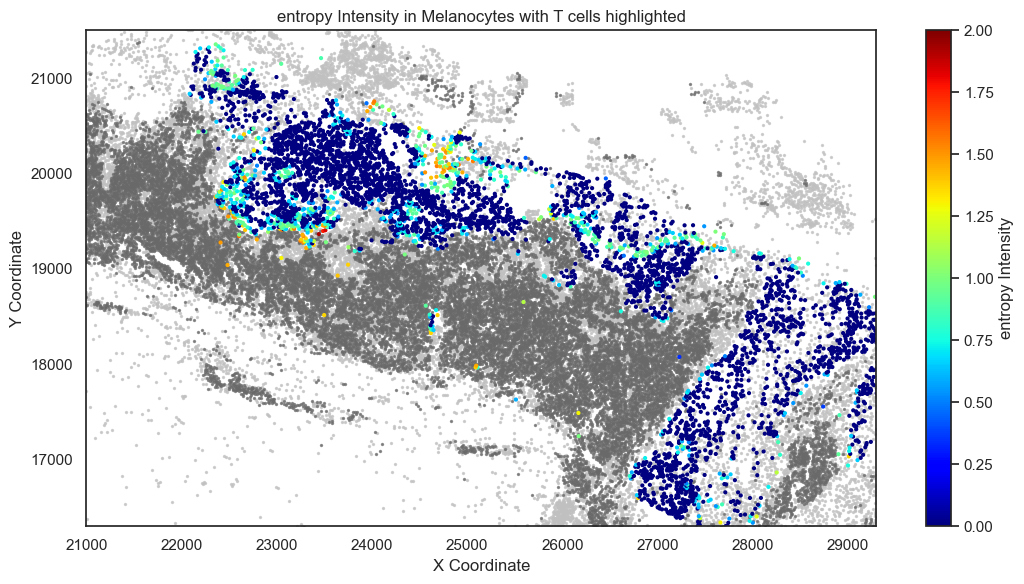

In [122]:
plot_tumor_marker_intensity_with_contours_dots(c, 'entropy', 'phenotype', 'Melanocytes', 'T cells', sigma=1, levels=10, dot_size=2)

In [176]:
imageid=['LSP11402--unmicst_cellRing']
bdata=adata[(adata.obs['imageid'].isin(imageid))]

In [177]:
bdata

View of AnnData object with n_obs × n_vars = 97814 × 42
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'phenotype'
    uns: 'all_markers', 'gates'
    layers: 'log'

In [178]:
# Load the ROI CSV file
roi_df = pd.read_csv(r"C:\Users\tav9\HMS Dropbox\Tuulia Vallius\PCA_phaseII\cycif_analysis_materials\data_EN_AA\ROIs_spatial_entropy_example\ROIs_Fig2\LSP11402.ome.tif-1732995-rois_high_entropy_score_for_VGP.csv")

bdata = sm.hl.addROI_omero(bdata, roi=roi_df, label='microregion_entropy')

C:\Users\tav9\AppData\Local\anaconda3\envs\scimap_new\lib\site-packages\scimap\helpers\addROI_omero.py:200: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.



In [179]:
bdata.obs

,X_centroid,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation,CellID,imageid,phenotype,microregion_entropy
LSP11402--unmicst_cellRing_1,8466.955828,1838.760736,815,36.583536,28.447706,0.628747,0.971395,0.730287,-0.376446,1,LSP11402--unmicst_cellRing,Unknown,Other
LSP11402--unmicst_cellRing_2,11372.919094,1715.684466,618,32.219721,25.062981,0.628416,0.970173,0.772500,-0.369336,2,LSP11402--unmicst_cellRing,Unknown,Other
LSP11402--unmicst_cellRing_3,11352.555799,1719.262582,457,27.695558,21.613372,0.625291,0.954071,0.769360,-0.065055,3,LSP11402--unmicst_cellRing,Unknown,Other
LSP11402--unmicst_cellRing_4,12420.372984,250.173387,496,32.760519,20.683707,0.775489,0.892086,0.826667,-0.075458,4,LSP11402--unmicst_cellRing,Unknown,Other
LSP11402--unmicst_cellRing_5,12402.816705,250.679814,431,27.651093,20.430978,0.673832,0.936957,0.725589,-0.482607,5,LSP11402--unmicst_cellRing,Unknown,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LSP11402--unmicst_cellRing_97810,19190.510959,36995.449315,730,32.045045,30.693683,0.287338,0.899015,0.670956,0.896674,97810,LSP11402--unmicst_cellRing,Unknown,Other
LSP11402--unmicst_cellRing_97811,19169.002155,37001.950431,464,29.955798,20.537361,0.727989,0.915187,0.660969,0.611331,97811,LSP11402--unmicst_cellRing,Unknown,Other
LSP11402--unmicst_cellRing_97812,19141.864550,37009.014815,945,45.311994,27.841639,0.788961,0.933794,0.628324,-1.335016,97812,LSP11402--unmicst_cellRing,Unknown,Other
LSP11402--unmicst_cellRing_97813,19115.149153,37018.044068,295,23.928018,16.463577,0.725667,0.896657,0.558712,0.841372,97813,LSP11402--unmicst_cellRing,Unknown,Other


In [180]:
data1=pd.read_csv(r"C:\Users\tav9\HMS Dropbox\Tuulia Vallius\2024-Vallius-Novikov-Shi-Melanoma_PCA\data\e24\classical_nbhd_entropy\LSP11402_upper_classical_neighborhood_entropy_df.csv")

In [181]:
merged=bdata.to_df()
merged['CellID']=bdata.obs['CellID']
merged['phenotype']=bdata.obs['phenotype']
merged['X_centroid']=bdata.obs['X_centroid']
merged['Y_centroid']=bdata.obs['Y_centroid']
merged['imageid']=bdata.obs['imageid']
merged['microregion_entropy']=bdata.obs['microregion_entropy']
merged = merged.set_index('CellID')
data1 = data1.set_index('CellID')
del data1['X_centroid']
del data1['Y_centroid']
merged_data1 = merged.merge(data1, on='CellID', how='left')

In [182]:
merged_data1

,DNA1,5hmC,Tet2,SOX10,LaminA/C/B1,PMEL,SOX9,S100B,MART1,aSMA,...,Y_centroid,imageid,microregion_entropy,Unnamed: 0,SOX10+SOX9-NGFR-MART1-,SOX10+SOX9-NGFR-MART1+,SOX10+SOX9+NGFR-MART1+,SOX10+SOX9-NGFR+,SOX10+SOX9+NGFR-MART1-,entropy
CellID,,,,,,,,,,,,,,,,,,,,,
1,0.661408,0.262137,0.219694,0.125929,0.278366,0.278664,0.455833,0.150364,0.140347,0.122732,...,1838.760736,LSP11402--unmicst_cellRing,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.540931,0.376240,0.151334,0.038156,0.063879,0.103568,0.084423,0.026161,0.080631,0.095751,...,1715.684466,LSP11402--unmicst_cellRing,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.562489,0.389480,0.159167,0.040649,0.068727,0.165219,0.086260,0.023202,0.084161,0.096384,...,1719.262582,LSP11402--unmicst_cellRing,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.660484,0.430962,0.345492,0.152466,0.239505,0.254484,0.313912,0.130258,0.182051,0.123184,...,250.173387,LSP11402--unmicst_cellRing,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.643912,0.393867,0.309261,0.137096,0.217927,0.266098,0.292465,0.117564,0.177903,0.117812,...,250.679814,LSP11402--unmicst_cellRing,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97810,0.621184,0.232770,0.201925,0.120917,0.149485,0.217530,0.214421,0.131051,0.118902,0.121325,...,36995.449315,LSP11402--unmicst_cellRing,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97811,0.623853,0.261718,0.226530,0.126114,0.151614,0.170802,0.217134,0.129377,0.116434,0.122374,...,37001.950431,LSP11402--unmicst_cellRing,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97812,0.633119,0.317674,0.232177,0.127332,0.159197,0.151786,0.229003,0.130952,0.143743,0.122655,...,37009.014815,LSP11402--unmicst_cellRing,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
merged_data1.to_csv(r"C:\Users\tav9\HMS Dropbox\Tuulia Vallius\2024-Vallius-Novikov-Shi-Melanoma_PCA\data\e24\classical_nbhd_entropy\LSP11402_upper_classical_neighborhood_entropy_df_segmask_plots_Fig3.csv")

In [132]:
def plot_tumor_marker_intensity_with_contours_dots(df, marker_name, cell_type_col, tumor_cell_type, grey_cell_type, sigma=2, levels=10, n_bins=50, dot_size=20):
    """Plots marker intensity, contours, and dots with a specific population colored grey."""

    x = df['X_centroid'].values
    y = df['Y_centroid'].values
    intensity = df[marker_name].values
    cell_types = df[cell_type_col].values

    tumor_mask = cell_types == tumor_cell_type
    grey_mask = cell_types == grey_cell_type
    other_mask = ~(tumor_mask | grey_mask)

    x_tumor = x[tumor_mask]
    y_tumor = y[tumor_mask]
    intensity_tumor = intensity[tumor_mask]

    x_grey = x[grey_mask]
    y_grey = y[grey_mask]

    x_other = x[other_mask]
    y_other = y[other_mask]

    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()

    xi = np.linspace(x_min, x_max, n_bins)
    yi = np.linspace(y_min, y_max, n_bins)

    # Create the scatter plot
    plt.figure(figsize=(11, 6))
    plt.scatter(x_other, y_other, c='silver', s=dot_size, alpha=0.7, label='Other')
    plt.scatter(x_grey, y_grey, c='dimgrey', s=dot_size, alpha=0.7, label=grey_cell_type)
    plt.scatter(x_tumor, y_tumor, c=intensity_tumor, s=5, cmap='jet', vmin=0, vmax=2, label=f'{tumor_cell_type}')
    plt.colorbar(label=f'{marker_name} Intensity')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'{marker_name} Intensity in {tumor_cell_type} with {grey_cell_type} highlighted')
    #plt.legend()
    plt.xlim(11700, 18000)
    plt.ylim(32800, 36500)

    plt.tight_layout()
    plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/entropy_plot_MEL25.png", dpi=600)
    plt.show()
  

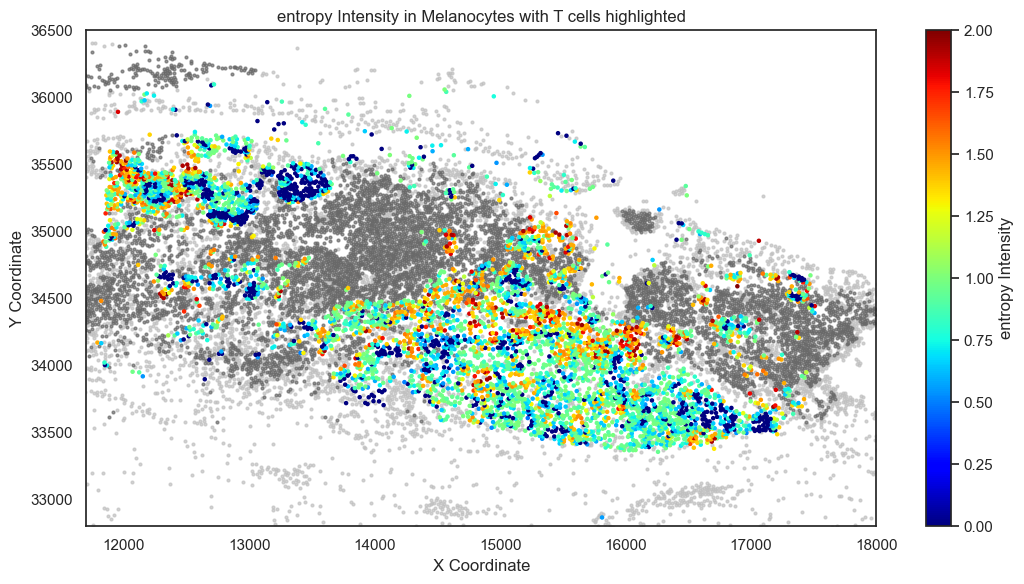

In [133]:
plot_tumor_marker_intensity_with_contours_dots(merged_data1, 'entropy', 'phenotype', 'Melanocytes', 'T cells', sigma=1, levels=10, dot_size=4)

In [135]:
# Load the ROI CSV file
roi_df = pd.read_csv(r"C:\Users\tav9\HMS Dropbox\Tuulia Vallius\PCA_phaseII\cycif_analysis_materials\data_EN_AA\ROIs_spatial_entropy_example\ROIs_Fig2\LSP11402.ome.tif-1732995-rois_high_entropy_score_for_VGP.csv")

bdata = sm.hl.addROI_omero(bdata, roi=roi_df, label='microregion_entropy')

C:\Users\tav9\AppData\Local\anaconda3\envs\scimap_new\lib\site-packages\scimap\helpers\addROI_omero.py:200: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.



In [137]:
region=['high_local_entropy','low_local_entropy']
bdata_microregion=bdata[(bdata.obs['microregion_entropy'].isin(region))]

In [138]:
bdata_microregion

View of AnnData object with n_obs × n_vars = 283 × 42
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'phenotype', 'microregion_entropy'
    uns: 'all_markers', 'gates'
    layers: 'log'

In [144]:
bdata_microregion_df=bdata_microregion.to_df()
bdata_microregion_df['CellID']=bdata_microregion.obs['CellID']
bdata_microregion_df['microregion_entropy']=bdata.obs['microregion_entropy']
bdata_microregion_df['phenotype']=bdata_microregion.obs['phenotype']
bdata_microregion_df['X_centroid']=bdata_microregion.obs['X_centroid']
bdata_microregion_df['Y_centroid']=bdata_microregion.obs['Y_centroid']
bdata_microregion_df = bdata_microregion_df.set_index('CellID')
bdata_microregion_df = bdata_microregion_df.merge(data1, on='CellID', how='left')

In [145]:
region=['high_local_entropy']
high_local_entropy=bdata_microregion_df[(bdata_microregion_df['microregion_entropy'].isin(region))]

In [150]:
def plot_tumor_marker_intensity_with_contours_dots(df, marker_name, cell_type_col, tumor_cell_type, grey_cell_type, sigma=2, levels=10, n_bins=50, dot_size=20):
    """Plots marker intensity, contours, and dots with a specific population colored grey."""

    x = df['X_centroid'].values
    y = df['Y_centroid'].values
    intensity = df[marker_name].values
    cell_types = df[cell_type_col].values

    tumor_mask = cell_types == tumor_cell_type
    grey_mask = cell_types == grey_cell_type
    other_mask = ~(tumor_mask | grey_mask)

    x_tumor = x[tumor_mask]
    y_tumor = y[tumor_mask]
    intensity_tumor = intensity[tumor_mask]

    x_grey = x[grey_mask]
    y_grey = y[grey_mask]

    x_other = x[other_mask]
    y_other = y[other_mask]

    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()

    xi = np.linspace(x_min, x_max, n_bins)
    yi = np.linspace(y_min, y_max, n_bins)

    # Create the scatter plot
    plt.figure(figsize=(3,2))
    plt.scatter(x_other, y_other, c='silver', s=dot_size, alpha=0.7, label='Other')
    plt.scatter(x_grey, y_grey, c='dimgrey', s=dot_size, alpha=0.7, label=grey_cell_type)
    plt.scatter(x_tumor, y_tumor, c=intensity_tumor, s=5, cmap='jet', vmin=0, vmax=2, label=f'{tumor_cell_type}')
    plt.colorbar(label=f'{marker_name} Intensity')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'{marker_name} Intensity in {tumor_cell_type} with {grey_cell_type} highlighted')
    #plt.legend()
    #plt.xlim(11700, 18000)
    #plt.ylim(32800, 36500)

    plt.tight_layout()
    #plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/entropy_plot_MEL25.png", dpi=600)
    plt.show()
  

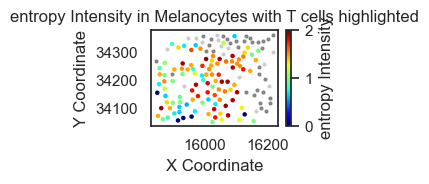

In [151]:
plot_tumor_marker_intensity_with_contours_dots(high_local_entropy, 'entropy', 'phenotype', 'Melanocytes', 'T cells', sigma=1, levels=10, dot_size=4)

In [152]:
high_local_entropy

,DNA1,5hmC,Tet2,SOX10,LaminA/C/B1,PMEL,SOX9,S100B,MART1,aSMA,...,phenotype,X_centroid,Y_centroid,Unnamed: 0,SOX10+SOX9-NGFR-MART1-,SOX10+SOX9-NGFR-MART1+,SOX10+SOX9+NGFR-MART1+,SOX10+SOX9-NGFR+,SOX10+SOX9+NGFR-MART1-,entropy
CellID,,,,,,,,,,,,,,,,,,,,,
69829,0.876237,0.523348,0.329175,0.626898,0.773513,0.532733,0.520260,0.524553,0.618703,0.120155,...,Melanocytes,16024.379397,34051.922111,1863.0,0.600000,0.400000,0.0,0.0,0.000000,0.970951
69840,0.785362,0.422627,0.256669,0.566736,0.665319,0.268676,0.345963,0.519603,0.235783,0.131022,...,Melanocytes,16155.066019,34054.615534,1872.0,0.777778,0.111111,0.0,0.0,0.111111,0.986427
69850,0.833079,0.529880,0.351744,0.692395,0.723134,0.264523,0.376358,0.800134,0.209813,0.124504,...,Melanocytes,15914.806653,34057.068607,1880.0,1.000000,0.000000,0.0,0.0,0.000000,-0.000000
69853,0.810329,0.465754,0.327531,0.631620,0.706817,0.240363,0.376966,0.794298,0.206695,0.120467,...,Melanocytes,15931.653543,34065.758530,1883.0,1.000000,0.000000,0.0,0.0,0.000000,-0.000000
69858,0.766339,0.380230,0.223849,0.563935,0.639367,0.173495,0.415900,0.492803,0.490202,0.124205,...,Melanocytes,16109.470024,34058.851319,1888.0,0.666667,0.166667,0.0,0.0,0.166667,1.251629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70633,0.887023,0.459337,0.259340,0.606645,0.736379,0.216873,0.432394,0.475640,0.137337,0.122886,...,Melanocytes,16094.290466,34356.441242,2464.0,0.833333,0.166667,0.0,0.0,0.000000,0.650022
70647,0.944892,0.517133,0.203626,0.234783,0.799553,0.178311,0.405863,0.358956,0.134954,0.123449,...,Myeloid lineage,16038.242667,34361.461333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70649,0.880684,0.471945,0.218076,0.250459,0.706708,0.198138,0.352253,0.370530,0.139084,0.124301,...,T cells,16131.604167,34358.677083,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Patch
from matplotlib.font_manager import FontProperties
import colorsys
# -----------------------------------------------------------------------
# 1) BASIC SETUP
# -----------------------------------------------------------------------
output_dir = r"C:\Users\mam0576\Documents"  # Change as needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
# -----------------------------------------------------------------------
# 2) TOGGLE WHICH MODE YOU WANT
#    - use_highlighting = True --> populations in phenotypes_to_highlight are colored, others gray
#    - use_highlighting = False -> all phenotypes get distinct colors
# -----------------------------------------------------------------------
use_highlighting = False  # <-- Change to True or False
phenotypes_to_highlight = [
    "CD8+ T cells",
    "B cells",
    "CD4+ T cells",
    "Treg"
]
highlight_palette = {
    "CD8+ T cells": (0.0, 1.0, 1.0),  # Cyan
    "B cells":      (1.0, 0.0, 1.0),  # Magenta
    "CD4+ T cells": (1.0, 1.0, 0.0),  # Yellow
    "Treg":         (0.0, 1.0, 0.0),  # Green
}
# -----------------------------------------------------------------------
# 3) PHENOTYPE COLUMN NAME
# -----------------------------------------------------------------------
phenotype_col_name = "phenotype_general"  # <--- Must match exactly your data
# -----------------------------------------------------------------------
# 4) DETERMINE ALL UNIQUE PHENOTYPES, BUILD COLOR MAP
# -----------------------------------------------------------------------
# Extract unique phenotypes (non-NaN), convert to strings, strip whitespace
raw_phenotypes = adata.obs[phenotype_col_name].dropna().astype(str).str.strip()
unique_phenotypes = sorted(raw_phenotypes.unique().tolist())
print("INFO: The script is in '{}' mode.\n".format(
    "HIGHLIGHT" if use_highlighting else "DISTINCT"
))
phenotype_color_map = {}
gray_color = (0.5, 0.5, 0.5)
if use_highlighting:
    # MODE A: HIGHLIGHT SELECTED PHENOTYPES => custom color, else gray
    for pheno in unique_phenotypes:
        if pheno in phenotypes_to_highlight and pheno in highlight_palette:
            phenotype_color_map[pheno] = highlight_palette[pheno]
        elif pheno in phenotypes_to_highlight:
            # If it's in highlight list but missing from highlight_palette,
            # fallback to gray (unlikely scenario)
            phenotype_color_map[pheno] = gray_color
        else:
            # Not in highlight list => gray
            phenotype_color_map[pheno] = gray_color
else:
    # MODE B: DISTINCT COLOR FOR EVERY PHENOTYPE
    n = len(unique_phenotypes)
    for i, pheno in enumerate(unique_phenotypes):
        hue = i / max(1, n)
        r, g, b = colorsys.hsv_to_rgb(hue, 0.8, 0.9)
        phenotype_color_map[pheno] = (r, g, b)
# Debug info: which color each phenotype gets
print("DEBUG: Phenotype => assigned color:")
for p in unique_phenotypes:
    print(f"  '{p}' => {phenotype_color_map[p]}")
# -----------------------------------------------------------------------
# 5) NORMALIZE MAJOR/MINOR AXIS
# -----------------------------------------------------------------------
global_major_length_min = adata.obs['MajorAxisLength'].min()
global_major_length_max = adata.obs['MajorAxisLength'].max()
global_minor_length_min = adata.obs['MinorAxisLength'].min()
global_minor_length_max = adata.obs['MinorAxisLength'].max()
def normalize_length(length, length_min, length_max, min_size, max_size):
    if length_max == length_min:
        return (min_size + max_size) / 2
    normalized = (length - length_min) / (length_max - length_min)
    return normalized * (max_size - min_size) + min_size
min_size = 5.0
max_size = 50.0
adata.obs['normalized_major_length'] = adata.obs['MajorAxisLength'].apply(
    normalize_length, args=(global_major_length_min, global_major_length_max, min_size, max_size)
)
adata.obs['normalized_minor_length'] = adata.obs['MinorAxisLength'].apply(
    normalize_length, args=(global_minor_length_min, global_minor_length_max, min_size, max_size)
)
# -----------------------------------------------------------------------
# 6) LOOP THROUGH IMAGES
# -----------------------------------------------------------------------
unique_imageids = adata.obs['imageid'].unique()
for image_id in unique_imageids:
    try:
        image_group = adata.obs[adata.obs['imageid'] == image_id].copy()
        num_cells = len(image_group)
        print(f"\nProcessing ImageID {image_id} with {num_cells} cells.")
        if num_cells == 0:
            print("No cells to plot. Skipping.")
            continue
        # Remove duplicates if necessary
        num_unique_cells = image_group['CellID'].nunique()
        if num_cells != num_unique_cells:
            print(f"Warning: Found {num_cells - num_unique_cells} duplicates. Removing.")
            image_group = image_group.drop_duplicates(subset='CellID', keep='first')
        # Each CellID has only one phenotype => keep first if multiple
        image_group = image_group.drop_duplicates(subset='CellID', keep='first')
        # FIGURE SETUP
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_aspect('equal', adjustable='box')
        ax.set_facecolor('black')
        # PLOT ELLIPSES
        for _, row in image_group.iterrows():
            # Get the phenotype name, strip whitespace
            phen = str(row[phenotype_col_name]).strip()
            # Fallback to gray if not found in map
            color = phenotype_color_map.get(phen, gray_color)
            ellipse = Ellipse(
                xy=(row['X_centroid'], row['Y_centroid']),
                width=row['normalized_major_length'],
                height=row['normalized_minor_length'],
                angle=row['Orientation'] * (180 / np.pi),
                facecolor=color,
                edgecolor='none',
                alpha=1.0
            )
            ax.add_patch(ellipse)
        # AXIS LIMITS
        x_min = image_group['X_centroid'].min() - max_size
        x_max = image_group['X_centroid'].max() + max_size
        y_min = image_group['Y_centroid'].min() - max_size
        y_max = image_group['Y_centroid'].max() + max_size
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.axis('off')
        # CREATE LEGEND
        legend_elements = []
        if use_highlighting:
            # Show ONLY highlighted phenotypes in legend
            for p in phenotypes_to_highlight:
                c = highlight_palette.get(p, gray_color)
                legend_elements.append(Patch(facecolor=c, label=p))
        else:
            # Show ALL phenotypes in distinct mode
            for p in unique_phenotypes:
                legend_elements.append(Patch(facecolor=phenotype_color_map[p], label=p))
        if len(legend_elements) > 0:
            title_font = FontProperties(size=14, weight='bold')
            legend = ax.legend(
                handles=legend_elements,
                bbox_to_anchor=(1.25, 1),
                loc='upper right',
                title="Phenotype",
                facecolor='black',
                framealpha=0.8,
                edgecolor="white",
                title_fontproperties=title_font,
                prop={"size": 12}
            )
            # Make legend text white
            for text in legend.get_texts():
                text.set_color('white')
            legend.get_title().set_color('white')
        plt.tight_layout(rect=[0, 0, 0.75, 1])  # Expand space for legend
        file_path = os.path.join(output_dir, f"image_{image_id}_cell_shapes.png")
        plt.savefig(
            file_path,
            dpi=3000,     # High resolution
            format='png',
            facecolor=fig.get_facecolor(),
            bbox_inches='tight'
        )
        plt.close(fig)
        print(f"Saved {file_path}")
    except Exception as e:
        print(f"Error processing ImageID {image_id}: {e}")
        # raise